In [4]:
import requests
from bs4 import BeautifulSoup
import re
import json

# 發送 GET 請求並獲取網頁內容
url = "https://www.bbc.com/news"
response = requests.get(url)
html = response.text

# 使用 BeautifulSoup 解析 HTML
soup = BeautifulSoup(html, "html.parser")

# 找到所有標題的 <h3> 元素
titles = soup.find_all("h3", class_="gs-c-promo-heading__title")

# 提取標題文本並進行正規劃和刪除指定內容
title_list = []
for title in titles:
    text = title.get_text(strip=True)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"BBC World News TV", "", text)
    text = re.sub(r"BBC World Service Radio", "", text)
    text = text.strip()  # 移除文本前後的空白字符
    if text:
        title_list.append(text)

# 將結果存儲為 JSON 檔案
with open("titles.json", "w", encoding="utf-8") as file:
    json.dump(title_list, file, ensure_ascii=False, indent=4)

# 印出提取的標題
for title in title_list:
    print(title)

People spend night on roofs and in trees after Ukraine dam breach
People spend night on roofs and in trees after Ukraine dam breach
ByteDance accused of helping China spy on HK activists
Why is Japan redefining rape?
Liang and Li handed lifetime bans for match-fixing
Why it took 42 years to convict a 90-year-old in India
Watch moment thief gives up on liquor store robbery
Japan rethinks tattoo ban in defence forces
Orange wildfire haze blankets North America cities
Has Saudi Arabia bought men's professional golf?
Pope Francis, 86, to have abdomen surgery
Chris Christie's long-shot mission to torpedo Trump
Pope Francis, 86, to have abdomen surgery
Chris Christie's long-shot mission to torpedo Trump
Seven shot at Virginia high school graduation
Prince Harry arrives for day two cross-examination in hacking trial
Sunak to raise trade issues in US talks with Biden
Breaching the Kakhovka dam – who benefits?
Ros Atkins unpacks the Ukraine dam breach
'More water is coming every hour' - people 

In [5]:
import openai
import pandas as pd

In [6]:
with open('titles.json', 'r',encoding='utf-8') as fh:
    tmp = fh.read()
    itemlist = tmp.split(',')

In [7]:
itemlist = str(itemlist)

In [8]:
keyfile = open("key.txt", "r")
key = keyfile.readline()
openai.api_key = key

In [9]:
data = [itemlist[0:3200], itemlist[3201:6400]]

In [10]:
data[0]

'[\'[\\n    "People spend night on roofs and in trees after Ukraine dam breach"\', \'\\n    "People spend night on roofs and in trees after Ukraine dam breach"\', \'\\n    "ByteDance accused of helping China spy on HK activists"\', \'\\n    "Why is Japan redefining rape?"\', \'\\n    "Liang and Li handed lifetime bans for match-fixing"\', \'\\n    "Why it took 42 years to convict a 90-year-old in India"\', \'\\n    "Watch moment thief gives up on liquor store robbery"\', \'\\n    "Japan rethinks tattoo ban in defence forces"\', \'\\n    "Orange wildfire haze blankets North America cities"\', \'\\n    "Has Saudi Arabia bought men\\\'s professional golf?"\', \'\\n    "Pope Francis\', \' 86\', \' to have abdomen surgery"\', \'\\n    "Chris Christie\\\'s long-shot mission to torpedo Trump"\', \'\\n    "Pope Francis\', \' 86\', \' to have abdomen surgery"\', \'\\n    "Chris Christie\\\'s long-shot mission to torpedo Trump"\', \'\\n    "Seven shot at Virginia high school graduation"\', \'\\n

In [11]:
def chatgptfn(itemlist):
    result = ''
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an assistant"},
            {"role": "user", "content": f"{itemlist} :make the text in the same line and keep the words only. "}
        ]
    )
    for choice in response.choices:
        result += choice.message.content
    return result

In [12]:
for i in range(0,2):
    data[i] = chatgptfn(data[i])

In [13]:
data[0]

'"People spend night on roofs and in trees after Ukraine dam breach", "People spend night on roofs and in trees after Ukraine dam breach", "ByteDance accused of helping China spy on HK activists", "Why is Japan redefining rape?", "Liang and Li handed lifetime bans for match-fixing", "Why it took 42 years to convict a 90-year-old in India", "Watch moment thief gives up on liquor store robbery", "Japan rethinks tattoo ban in defence forces", "Orange wildfire haze blankets North America cities", "Has Saudi Arabia bought men\'s professional golf?", "Pope Francis 86 to have abdomen surgery", "Chris Christie\'s long-shot mission to torpedo Trump", "Pope Francis 86 to have abdomen surgery", "Chris Christie\'s long-shot mission to torpedo Trump", "Seven shot at Virginia high school graduation", "Prince Harry arrives for day two cross-examination in hacking trial", "Sunak to raise trade issues in US talks with Biden", "Breaching the Kakhovka dam – who benefits?", "Ros Atkins unpacks the Ukraine

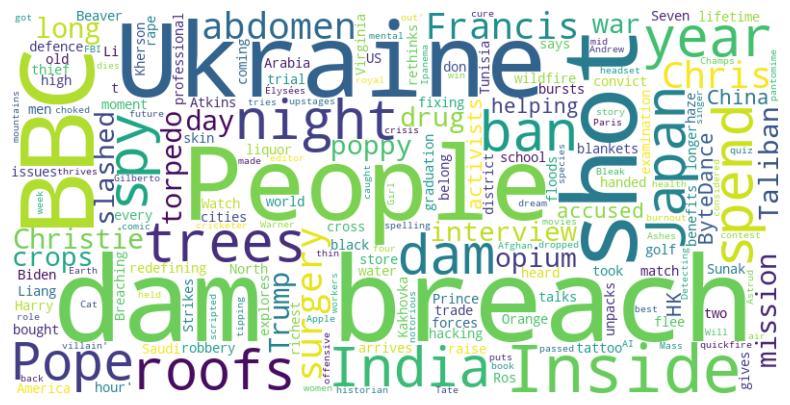

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 創建 WordCloud 對象
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(data[0])

# 繪製文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()